In [4]:
from MonteCarlo import MonteCarlo
import random
import numpy as np
from copy import deepcopy
class Q_Learning(MonteCarlo):
    def __init__(self,env,discount=1, epsilon=0,alpha = 0):
        super().__init__(env,discount,epsilon)
        
        self._alpha = alpha
        
    def _get_next_action(self,scenario,loc,explore = True):
        """ greedy or epsilon greedy search
            if multiple actions found in greedy
            will take randomly              """
        action_list = self._check_avaiable_actions(loc)
        
        rand = random.random()
        
        reward_list = []
        for action in action_list:
            reward_list.append(self._env._check_action_reward(action,loc)[1])
        index = random.choice(np.argwhere(reward_list == np.amax(reward_list)))[0]
        
        action_max = action_list[index]
        
        if explore:
            if 0 <= rand <= self._epsilon:
                return random.choice(action_list)

            else:
                return action_max
        if not explore:
            return action_max
        
    def _update_q_values(self,scenario,loc,action):
        """ update current qs """
        old_q = self._q_values[scenario][tuple(loc)][action]
        
        loc_1, r =  self._env._check_action_reward(action,loc)
        
        action_1_explore = self._get_next_action(scenario,tuple(loc_1),True)
        action_1_non_explore = self._get_next_action(scenario,tuple(loc_1),False)
        
        loc_2_explore, r_1_explore =  self._env._check_action_reward(action_1_explore,loc_1)
        
        q_1_non_explore = self._q_values[scenario][tuple(loc_1)][action_1_non_explore]
        
        new_q = old_q + self._alpha * (r_1_explore + self._discount * q_1_non_explore - old_q)
        
        self._q_values[scenario][tuple(loc)][action] = new_q
    
    def _run_episode(self):
        """ run episode once """
        self.loc_record = []
        self.reward_record = []
        self.action_record = []
        self._terminal_status = False
        
        self._env._player = self._all_states[0][0] # player start loc
        while not self._terminal_status :
            scenario = self._check_scenario()
            loc = self._env._player
            self.loc_record.append(loc)
            
            action = self._get_next_action(scenario,tuple(loc),True)
            self.action_record.append([scenario,loc,action])
            
            # update q value
            self._update_q_values(scenario,loc,action)                                                            
                        
            loc_1 = self._apply_action(action,loc)
            self._env._player = loc_1
            
            r = self._env._check_reward(loc_1)
            self.reward_record.append(r)

#             self.render()
            
#         print("steps taken:",len(self.loc_record))
            

    def run_algorithm(self,num_episode = 1,reduce_eps = False):
        self._eps_step = self._epsilon_copy/num_episode
        self._env.reset()
        self._env._star = deepcopy(self._star)
        self._epsilon = deepcopy(self._epsilon_copy)
        
        self._init_all_states()
        self._init_q_values()
        self._init_action_count()

        
        for i in range(num_episode):
            if reduce_eps:
                self._epsilon -= self._eps_step
            self._env._star = deepcopy(self._star)
            self._run_episode()

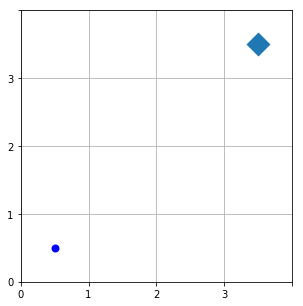

In [5]:
from MazeEnv import MazeGen
%matplotlib inline

maze = MazeGen(4,4)
maze.render()

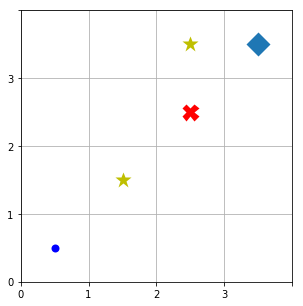

In [6]:
maze.set_grid(star=[1,1])
maze.set_grid(star=[2,3])
maze.set_grid(trap=[2,2])
alg = Q_Learning(maze,discount = 0.9,epsilon=0.1,alpha = 0.9)
alg.render()

In [9]:
alg.run_algorithm(10000,reduce_eps=True)

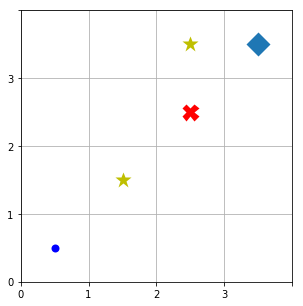

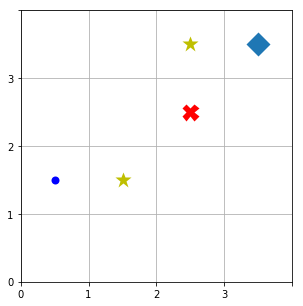

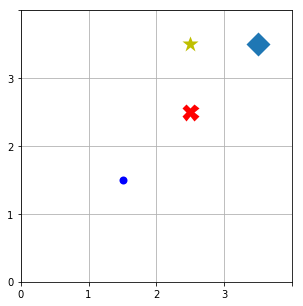

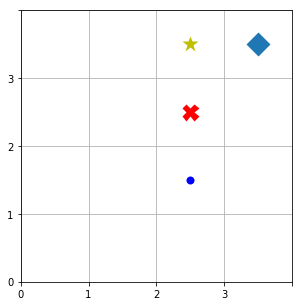

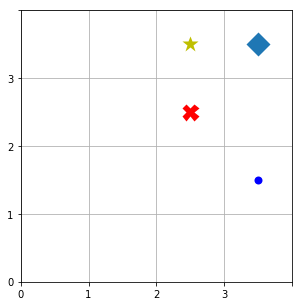

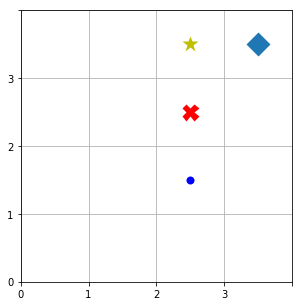

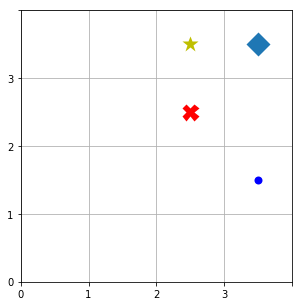

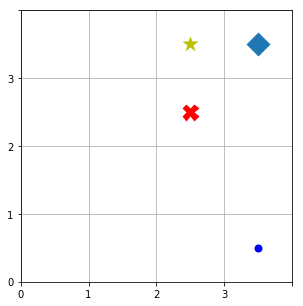

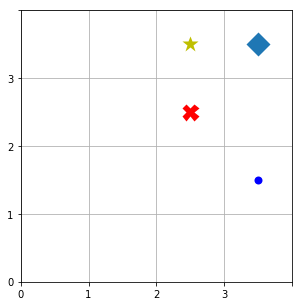

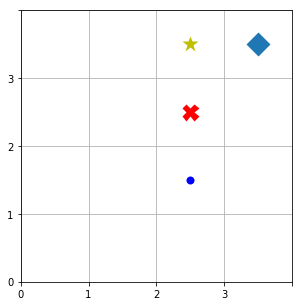

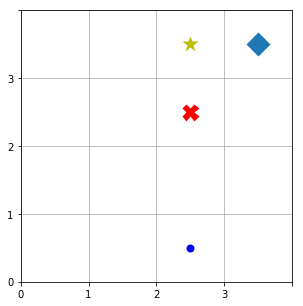

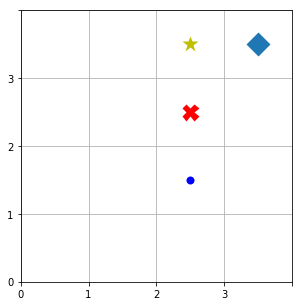

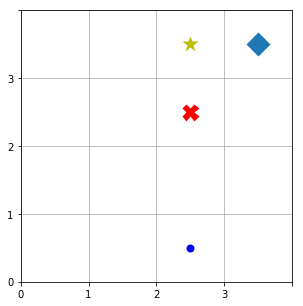

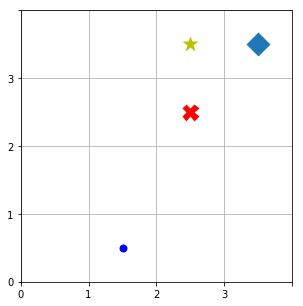

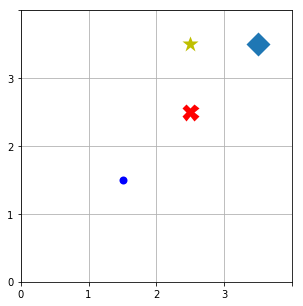

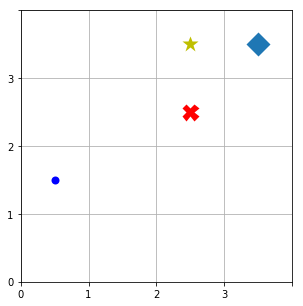

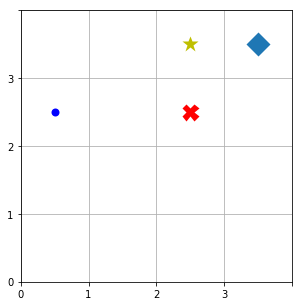

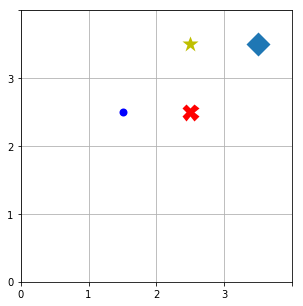

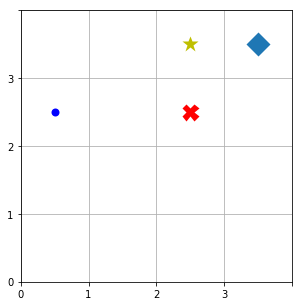

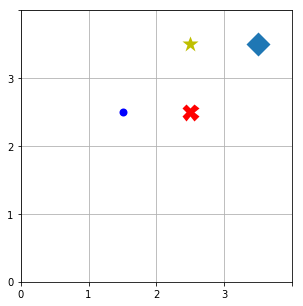

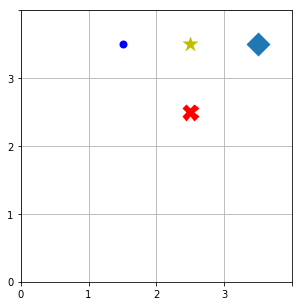

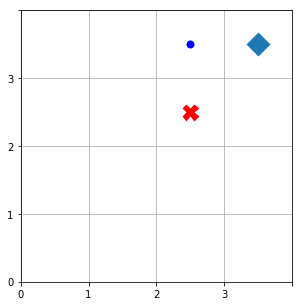

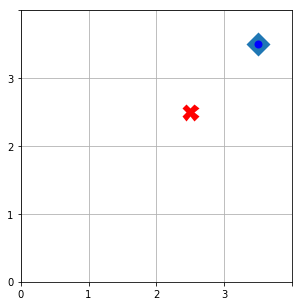

In [10]:
alg.plot_last_episode()